In [272]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import math
import json

# Question 5.1

In [273]:
def q5_1(year):
    
    game_types = ['regular_season', 'playoffs']
    shot_types_and_count = {}
    goal_shot_types_and_count = {}
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                for row in data:
                    shot_or_goal = row.get('Shot or Goal')
                    shot_type = row.get('Shot Type')
                    if shot_type != 'NA':
                        if shot_or_goal == "Goal":
                            if shot_type in goal_shot_types_and_count:
                                goal_shot_types_and_count[shot_type] += 1
                            else:
                                goal_shot_types_and_count[shot_type] = 1
                        elif shot_or_goal == "Shot":
                            if shot_type in shot_types_and_count:
                                shot_types_and_count[shot_type] += 1
                            else:
                                shot_types_and_count[shot_type] = 1
    
    shot_types_and_count_keys = np.array(list(shot_types_and_count.keys()))
    shot_types_and_count_values = np.array(list(shot_types_and_count.values()))
    
    sorted_order = shot_types_and_count_keys.argsort()
    shot_types_and_count_keys = shot_types_and_count_keys[sorted_order]
    shot_types_and_count_values = shot_types_and_count_values[sorted_order]
    
    print(shot_types_and_count_keys)
    print(shot_types_and_count_values)
    
    goal_shot_types_and_count_keys = np.array(list(goal_shot_types_and_count.keys()))
    goal_shot_types_and_count_values = np.array(list(goal_shot_types_and_count.values()))
    
    sorted_order = goal_shot_types_and_count_keys.argsort()
    goal_shot_types_and_count_keys = goal_shot_types_and_count_keys[sorted_order]
    goal_shot_types_and_count_values = goal_shot_types_and_count_values[sorted_order]

    print(goal_shot_types_and_count_values)
    print(goal_shot_types_and_count_values / (goal_shot_types_and_count_values + shot_types_and_count_values))

    plt.figure(figsize=(20, 8))
    
    plt.bar(goal_shot_types_and_count_keys, shot_types_and_count_values)#, color='b')
    plt.bar(goal_shot_types_and_count_keys, goal_shot_types_and_count_values, bottom=shot_types_and_count_values)#, color='r')

    plt.xlabel("Shot Type")
    plt.ylabel("Shot or Goal Count")
    plt.legend(["Shots", "Goals"])
    plt.title(f"Shot or Goal Counts for Various Shot Types in the {int(year)}-{int(year)+1} Season")
    plt.show()

['Backhand' 'Deflected' 'Slap Shot' 'Snap Shot' 'Tip-In' 'Wrap-around'
 'Wrist Shot']
[ 3915   986  7422  6988  2293   521 29973]
[ 538  182  560  812  504   38 2998]
[0.12081743 0.15582192 0.07015786 0.10410256 0.18019306 0.06797853
 0.09092839]


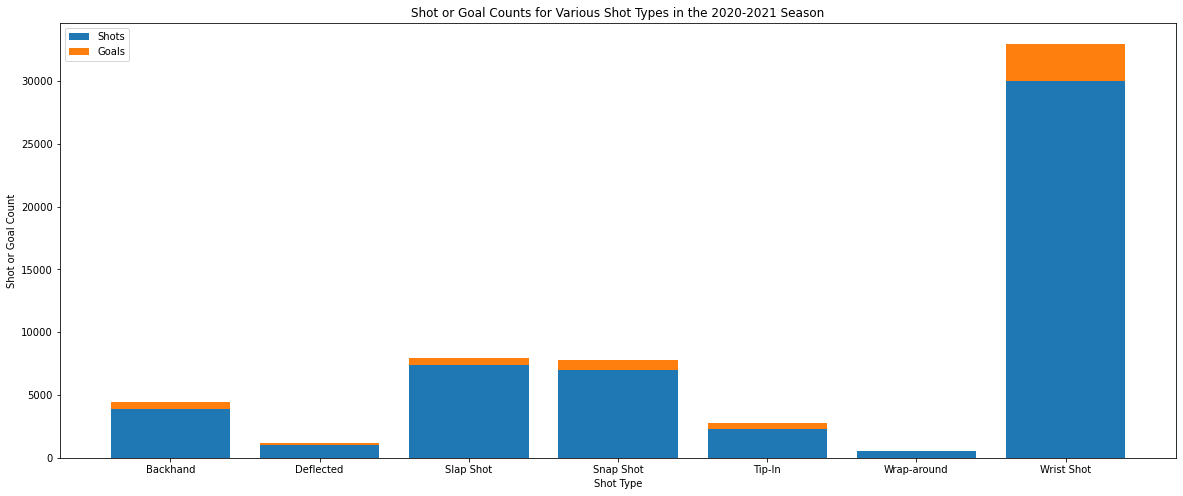

In [274]:
# q5_1('2016')
# q5_1('2017')
# q5_1('2018')
# q5_1('2019')
q5_1('2020')

Most dangerous type of shot: Wrap-around. It has the lowest shot (521) and goal count (38), as well as the lowest goal percentage (0.06797853). Therefore, it is dangerous to play this type of shot as it seems to be the least successful.

Most common type of shot: Wrist Shot. There were over 30000 total shots and goals from all shooters and scores in the 2020-2021 season who used a wrist shot.


# Question 5.2

In [275]:
def q5_2(year):
    
    game_types = ['regular_season', 'playoffs']
    shot_distances = []
    goal_distances = []
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                #open corresponding json file and get start home court side
                f = open(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                loaded_json = json.load(f)
                if len(loaded_json['liveData']['linescore']['periods']) > 0:
                    home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
            
                for row in data:
                    y_coor = row.get('Y-Coordinate') 
                    x_coor = row.get('X-Coordinate')

                    y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                    x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False
                
                    shot_or_goal = row.get('Shot or Goal')
                    # shot_type = row.get('Shot Type')
                    
                    if x_coor and y_coor:
                        if home_side == 'right':                    
                            if row.get('Home or Away') == 'Home':
                                if int(row.get('Period')) % 2 == 1:
                                    # print(row.get('Y-Coordinate'))
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    # print(distance)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)                                                     
                            else:
                                if int(row.get('Period')) % 2 == 1:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                        elif home_side == 'left':
                            if row.get('Home or Away') == 'Home':
                                if int(row.get('Period')) % 2 == 1:
                                    # print(row.get('Y-Coordinate'))
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)
                            else:
                                if int(row.get('Period')) % 2 == 1:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)
    
    # print(shot_distances)
    manual_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 
                   105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 
                   190]
    manual_bins_string = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55',
             '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', 
             '105-110', '110-115', '115-120', '120-125', '125-130', '130-135', '135-140', '140-145', 
             '145-150', '150-155', '155-160', '160-165', '165-170', '170-175', '175-180', '180-185', '185-190']
    
    (shot_counts, shot_bins, patches) = plt.hist(shot_distances, bins=manual_bins)
    print(shot_counts)
    print(shot_bins)
    (goal_counts, goal_bins, patches) = plt.hist(goal_distances, bins=shot_bins)
    print(goal_counts)
    plt.close()
    
    plt.figure(figsize=(45, 8))
    plt.bar(manual_bins_string, shot_counts)
    plt.bar(manual_bins_string, goal_counts, bottom=shot_counts)
    plt.xlabel("Shot Distance")
    plt.ylabel("Shot or Goal Count")
    plt.legend(["Shots", "Goals"])
    plt.title(f"Shot or Goal Counts based on Shot Distance in the {int(year)}-{int(year)+1} Season")
    plt.show()
    plt.close()

    goal_chance = goal_counts / (goal_counts + shot_counts)
    print(goal_chance)
    
    plt.figure(figsize=(45, 8))
    # plt.bar(manual_bins_string, goal_chance)
    plt.plot(manual_bins_string, goal_chance)
    plt.xlabel("Shot Distance")
    plt.ylabel("Goal Percentage")
    plt.title(f"Goal Percentage based on Shot Distance in the {int(year)}-{int(year)+1} Season")
    plt.show()
                                

[ 150. 5667. 7979. 5608. 5294. 5702. 5956. 6263. 5865. 5271. 5428. 5635.
 2969. 1120.  490.  466.  413.  362.  275.  148.  136.  125.   94.   59.
   97.  120.  125.  115.  121.  120.  125.  137.  135.  155.  150.  117.
  150.   39.]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190]
[  65. 1277. 1593. 1025.  750.  721.  559.  411.  286.  217.  177.  176.
   79.   24.   12.   18.   15.   10.   15.    4.    6.    4.    3.    4.
    6.    5.   11.    6.   11.    8.   12.    8.    7.    9.   18.    7.
   10.   10.]


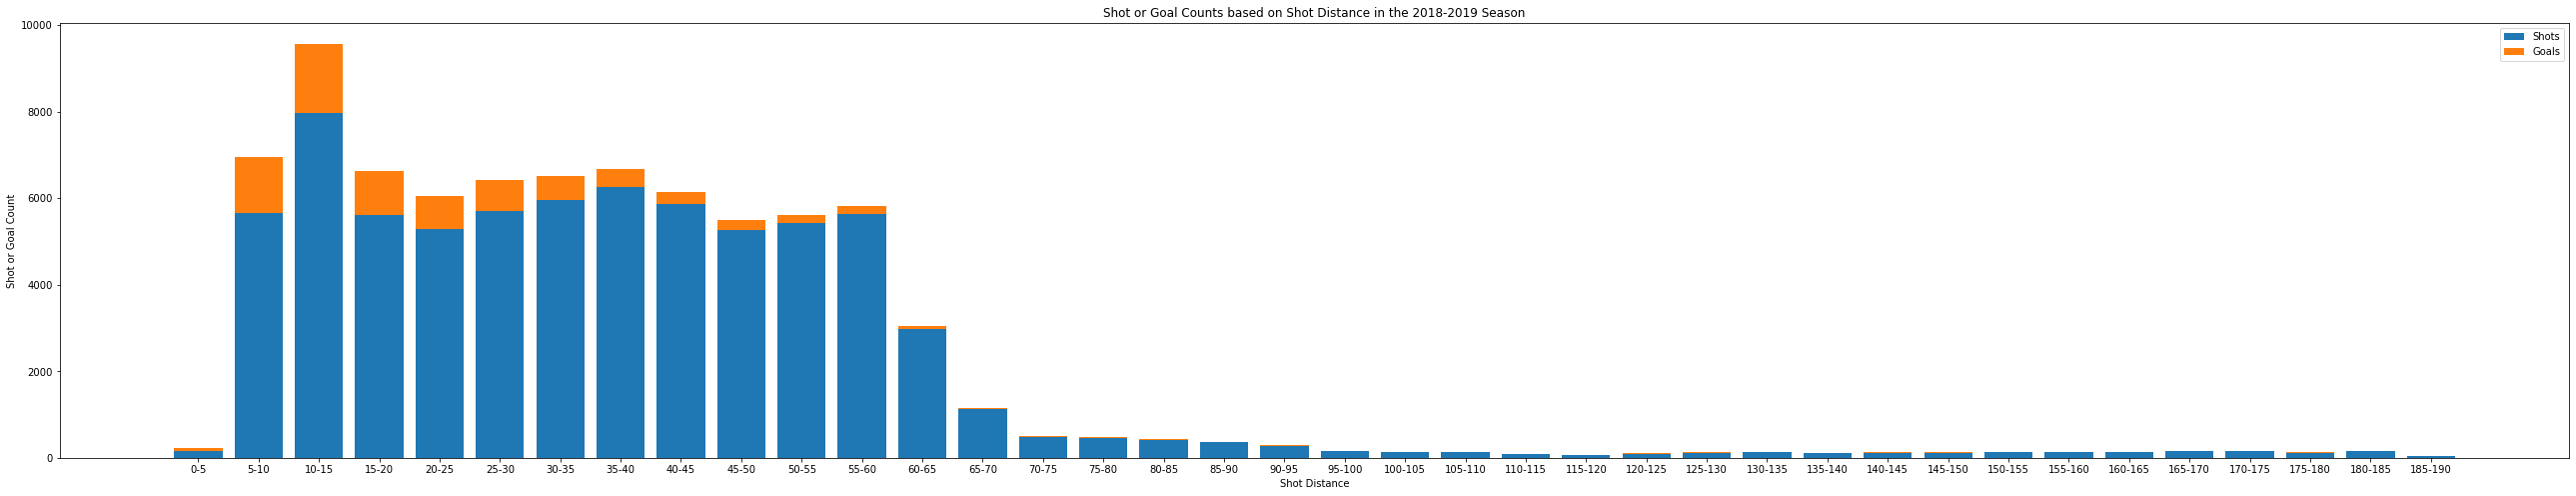

[0.30232558 0.18389977 0.1664229  0.15453038 0.12409001 0.11225284
 0.085802   0.06158226 0.0464965  0.03954082 0.03157895 0.03028739
 0.02591864 0.02097902 0.02390438 0.03719008 0.03504673 0.02688172
 0.05172414 0.02631579 0.04225352 0.03100775 0.03092784 0.06349206
 0.05825243 0.04       0.08088235 0.04958678 0.08333333 0.0625
 0.08759124 0.05517241 0.04929577 0.05487805 0.10714286 0.05645161
 0.0625     0.20408163]


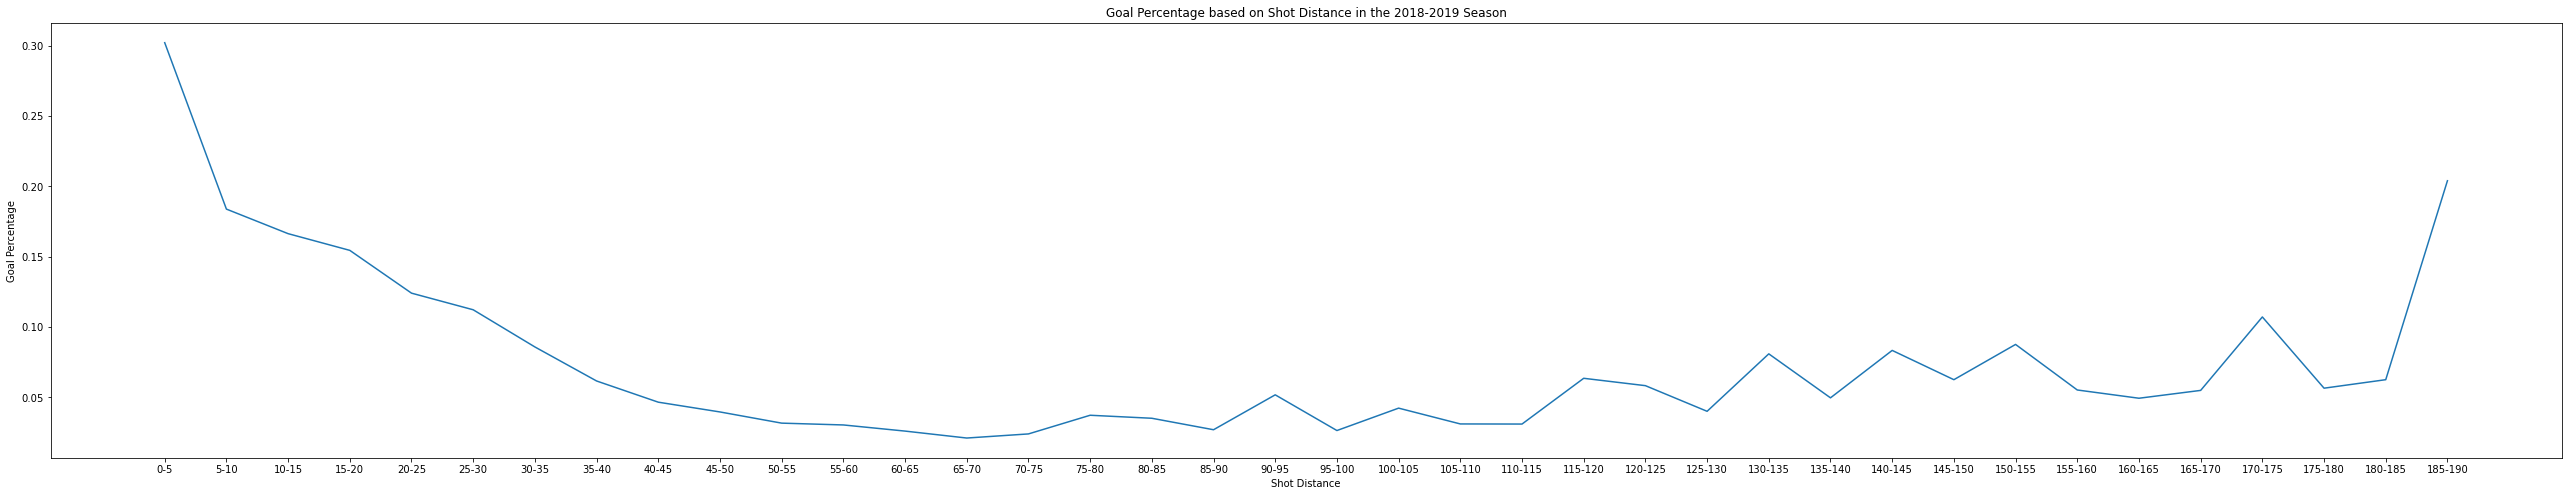

[ 177. 4662. 5980. 4502. 4216. 4738. 4868. 4798. 4753. 4165. 4711. 4801.
 2766. 1043.  390.  368.  372.  309.  231.  168.  126.  100.  101.   64.
  219.  329.  229.  174.  255.  293.  328.  320.  354.  359.  366.  178.
  107.   42.]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190]
[  81. 1201. 1214.  839.  640.  541.  446.  301.  237.  153.  141.  136.
   65.   28.    5.   13.    9.    8.    9.   13.    3.    5.    5.    2.
    8.   21.    9.    9.   17.   25.   30.   29.   44.   52.   53.   16.
    6.    9.]


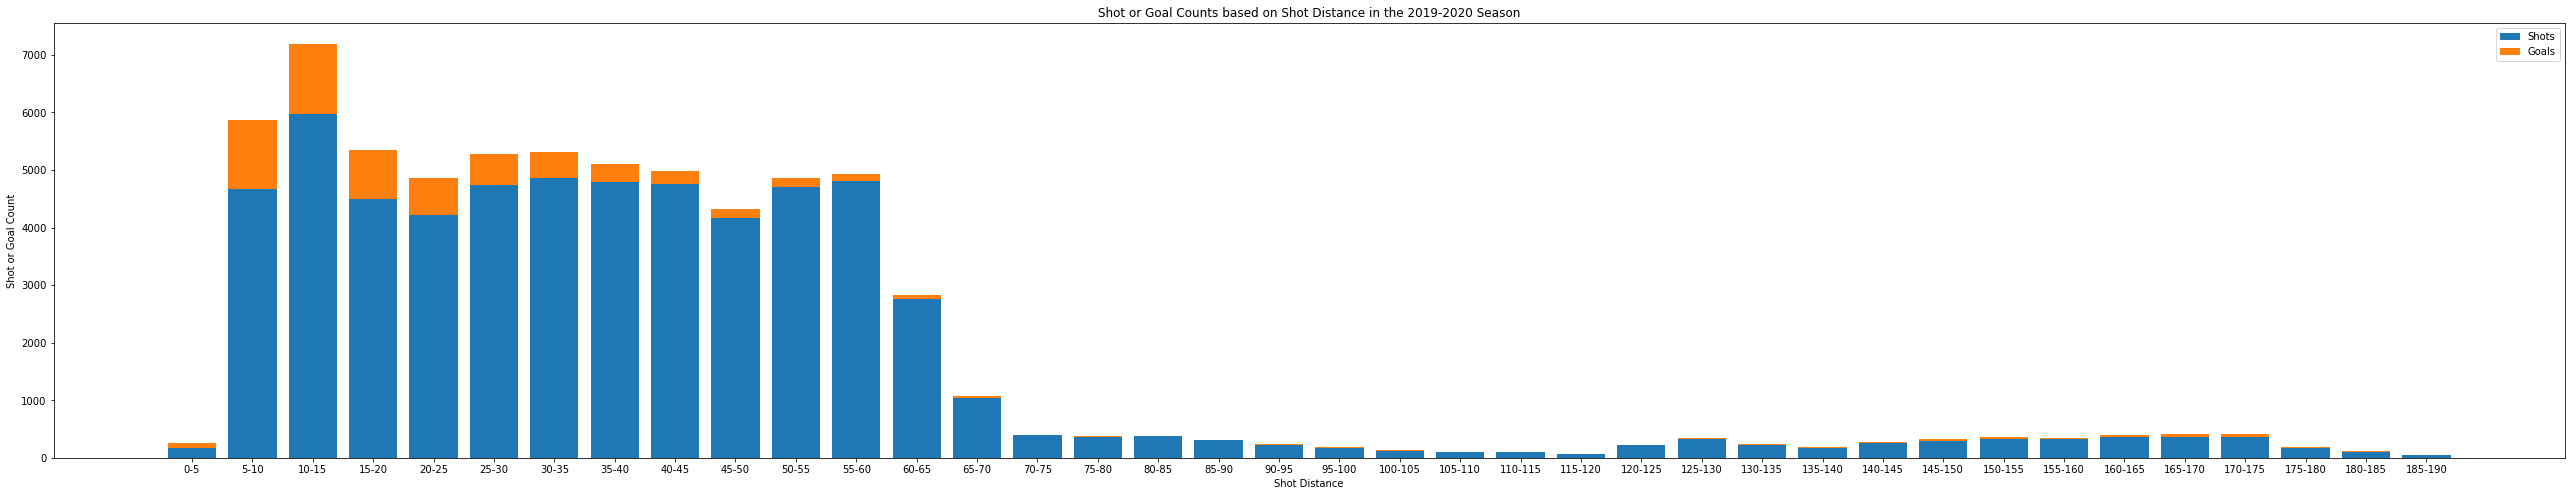

[0.31395349 0.20484394 0.16875174 0.15708669 0.13179572 0.10248153
 0.08392924 0.05903118 0.04749499 0.03543307 0.02906018 0.02754709
 0.02296008 0.02614379 0.01265823 0.03412073 0.02362205 0.02523659
 0.0375     0.0718232  0.02325581 0.04761905 0.04716981 0.03030303
 0.03524229 0.06       0.03781513 0.04918033 0.0625     0.07861635
 0.08379888 0.08309456 0.11055276 0.12652068 0.12649165 0.08247423
 0.05309735 0.17647059]


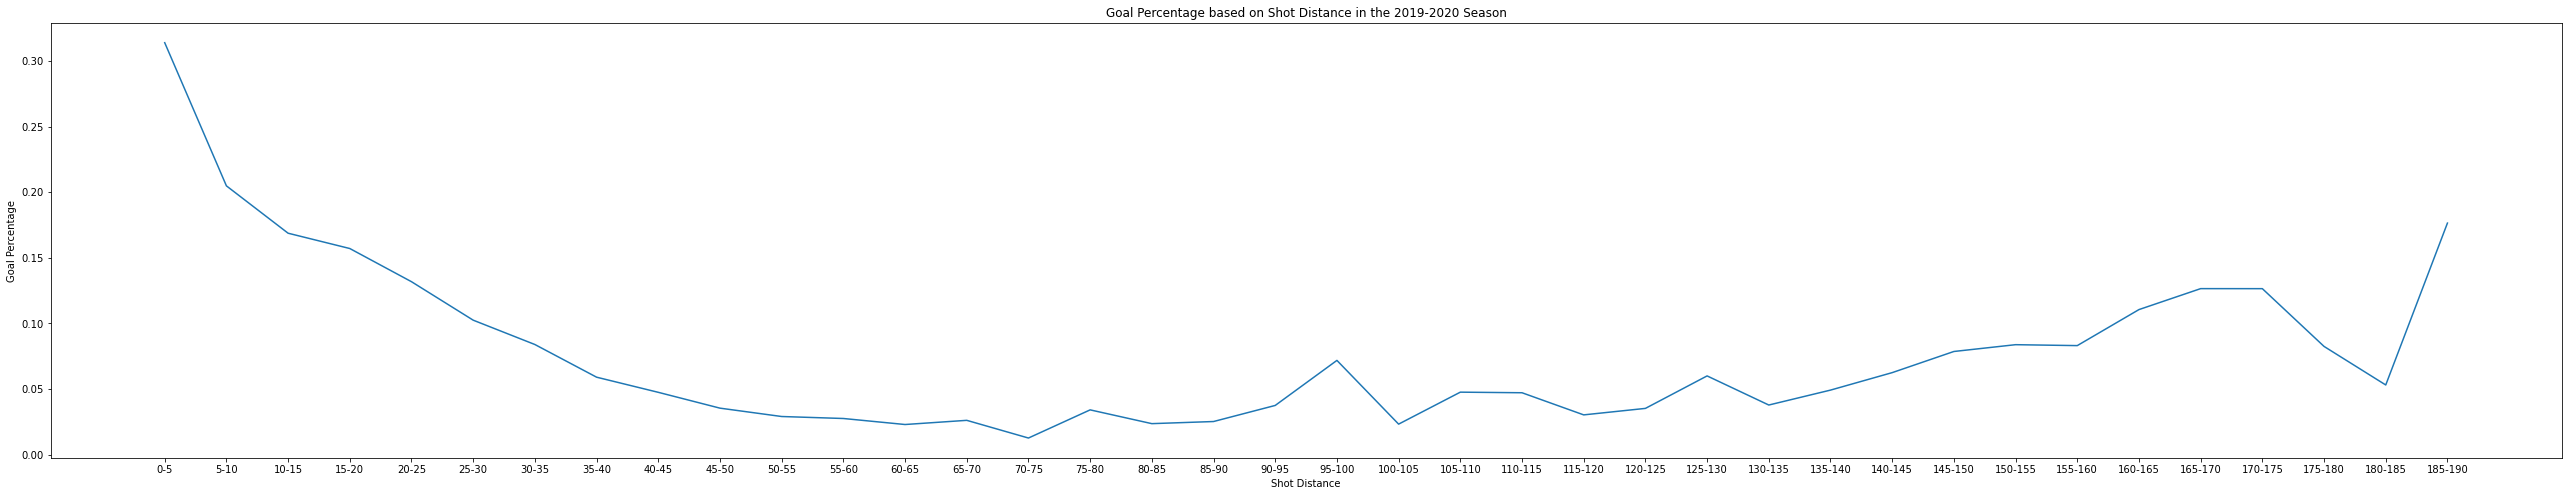

[ 138. 4003. 4863. 3600. 3610. 3777. 4192. 3902. 3683. 3528. 4074. 3786.
 2141.  691.  271.  250.  271.  219.  136.   96.   76.   58.   57.   28.
   60.   73.   88.   67.   70.   74.   75.   75.   94.   57.   61.   61.
   78.   29.]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190]
[  64. 1034.  921.  665.  523.  441.  377.  272.  164.  131.  122.  119.
   50.   15.    3.   16.    5.   17.    9.    3.    4.    6.    3.    2.
    9.    6.    4.    5.    6.   11.   11.    3.    9.    8.    3.    3.
    4.    3.]


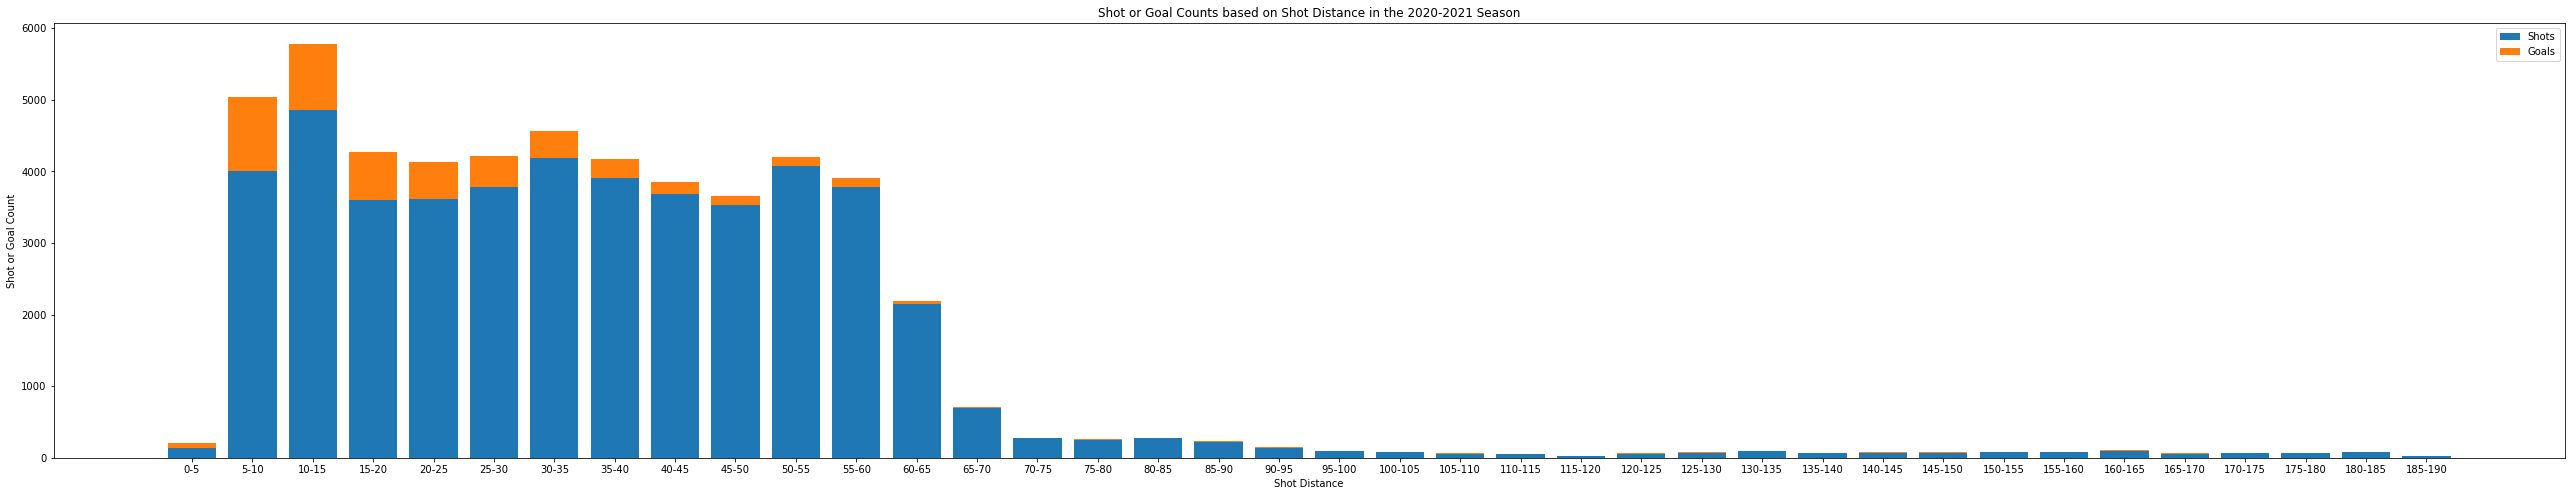

[0.31683168 0.20528092 0.15923237 0.15592028 0.12654246 0.10455192
 0.08251258 0.06516531 0.04263062 0.03580213 0.02907531 0.03047375
 0.02282063 0.02124646 0.01094891 0.06015038 0.01811594 0.0720339
 0.06206897 0.03030303 0.05       0.09375    0.05       0.06666667
 0.13043478 0.07594937 0.04347826 0.06944444 0.07894737 0.12941176
 0.12790698 0.03846154 0.08737864 0.12307692 0.046875   0.046875
 0.04878049 0.09375   ]


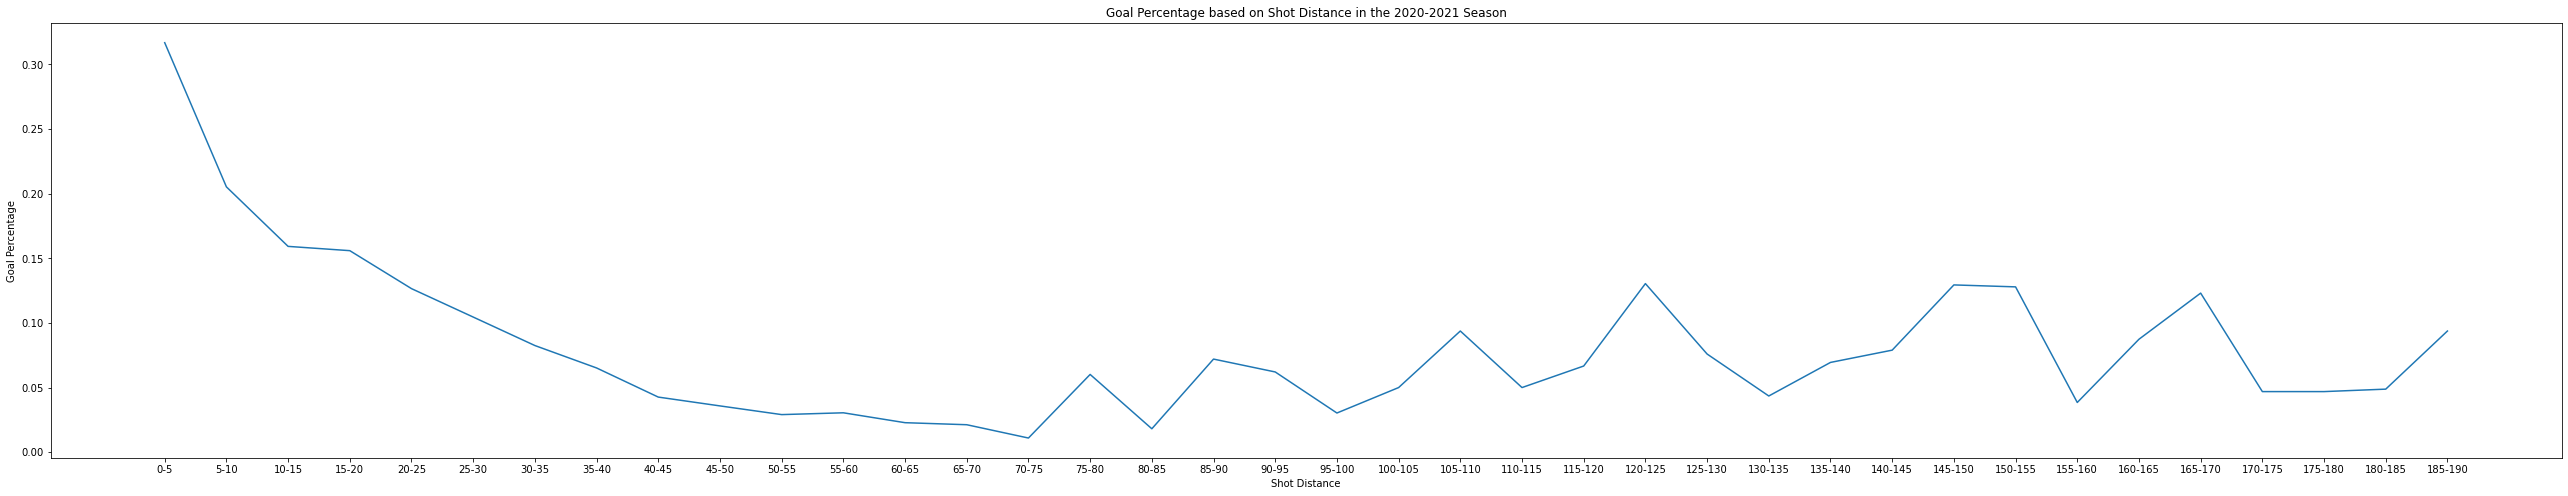

In [276]:
# q5_2('2016')
# q5_2('2017')
q5_2('2018')
q5_2('2019')
q5_2('2020')

Between the shot distances of 0 feet to 75 feet, from our "Goal Percentage based on Shot Distance in the X-Y Season" graphs, we can see that as shot distance increases, the goal percentage decreases. So, there is generally a negative correlation between shot distance and goal percentage between 0-75 feet. There is also very low shot and goal counts according to our "Shot or Goal Counts based on Shot Distance in the X-Y Season" histograms for shot distances beyond 75 feet, so there is very little sample size. The goal percentage for shots taken beyond 75 feet change very drastically for every shot distance bin. So, goal percentages beyond 75 feet can be mostly ignored. Between the previous 3 seasons, there seems to be very little change in the overall shape of the "Shot or Goal Counts based on Distance" and "Goal Percentage based on Shot Distance" graphs.

# Question 5.3

In [281]:
def q5_3(year):
    game_types = ['regular_season', 'playoffs']
    shot_categories = {}
    goal_shot_categories = {}
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                #open corresponding json file and get start home court side
                f = open(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                loaded_json = json.load(f)
                if len(loaded_json['liveData']['linescore']['periods']) > 0:
                    home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
            
                for row in data:
                    y_coor = row.get('Y-Coordinate') 
                    x_coor = row.get('X-Coordinate')

                    y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                    x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False
                
                    shot_or_goal = row.get('Shot or Goal')
                    shot_type = row.get('Shot Type')
                    
                    if shot_type != 'NA':
                        if x_coor and y_coor:
                            if home_side == 'right':                    
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        # print(distance)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]                                                    
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                            elif home_side == 'left':
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

    manual_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
    manual_bins_string = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 
                          '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180', 
                          '180-190']
    
    shot_categories_chances = {}
    for shot_type in shot_categories:
        (shot_counts, shot_bins, patches) = plt.hist(shot_categories[shot_type], bins=manual_bins)
        (goal_counts, goal_bins, patches) = plt.hist(goal_shot_categories[shot_type], bins=shot_bins)
        shot_categories_chances[shot_type] = goal_counts / (goal_counts + shot_counts + 0.000000001)
    plt.close()

    plt.figure(figsize=(45, 8))
    for shot_type in shot_categories_chances:
        plt.plot(manual_bins_string, shot_categories_chances[shot_type], label=shot_type)
    
    plt.xlabel("Shot Distance")
    plt.ylabel("Goal Percentage")
    plt.legend()
    plt.title(f"Goal Percentages for Various Shot Types in the {int(year)}-{int(year)+1} Season")
    plt.show()

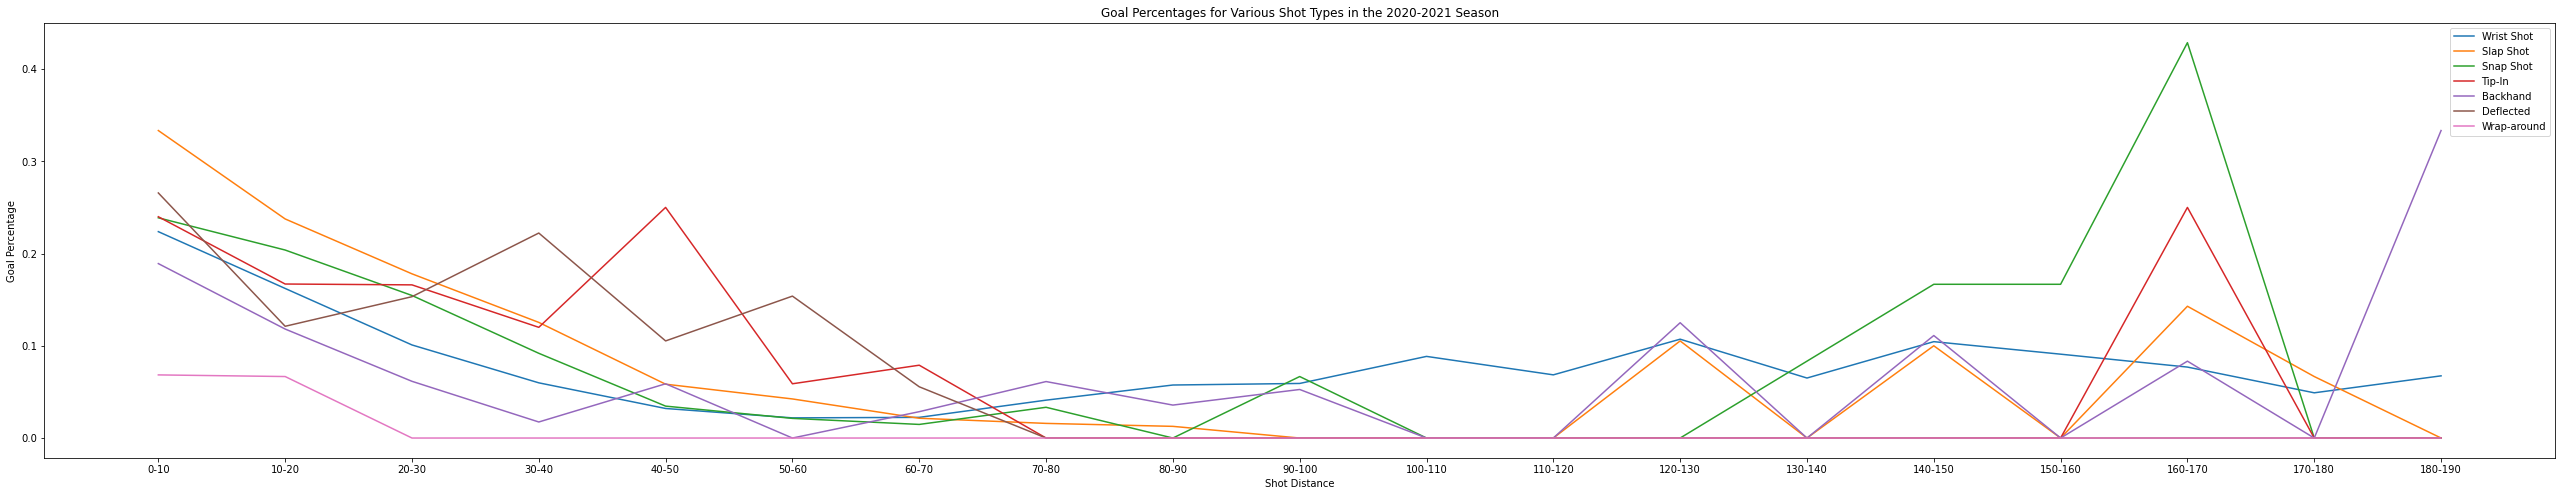

In [282]:
# q5_3('2018')
# q5_3('2019')
q5_3('2020')

If we associate this figure with our previous "Shot or Goal Counts based on Shot Distance" histograms in question 5.2, we know that shots taken from distances beyond 75 feet should mostly be disregarded due to very low sample size. So, looking just at shot types taken between 0-75 feet, we can sort of see a negative correlation relationship between shot distance and goal percentage among all types of shots. Although, it is not always as clear of a relationship because some curves have jumps. Slap shot (yellow) has the highest goal percentage between 0-30 feet, and has a relatively clear negative correlation. Wrap-around has the lowest goal percentages throughout the 0-75 feet range, which would make it the most dangerous type of shot because it yields the least goals.